In [611]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score

from itertools import combinations


In [612]:
df = pd.read_csv('../data/Speed Dating Data.csv')
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [613]:
INFO = ['iid', 'age', 'gender', 'dec_o']
ATTS = ['attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o']
INTERESTS = ['sports','tvsports','exercise','dining','museums','art','hiking',
    'gaming','clubbing','reading','tv','theater','movies','concerts','music','shopping','yoga']

model_df = df[ATTS+INFO+INTERESTS]
model_df = model_df.dropna(how='all')
model_df = model_df.groupby('iid').mean()
model_df.reset_index(inplace=True)

In [614]:
model_df = model_df.sort_values('dec_o', axis=0, ascending=False)
model_df[model_df['iid']<=5]

,iid,attr_o,sinc_o,intel_o,fun_o,amb_o,age,gender,dec_o,sports,...,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga
1,2,7.7,7.1,7.9,7.5,7.500000,24.0,0.0,0.6,3.0,...,5.0,8.0,10.0,1.0,9.0,8.0,7.0,8.0,3.0,1.0
3,4,7.0,7.1,7.7,7.5,7.700000,23.0,0.0,0.6,1.0,...,5.0,7.0,7.0,7.0,9.0,7.0,8.0,7.0,1.0,8.0
0,1,6.7,7.4,8.0,7.2,8.000000,21.0,0.0,0.5,9.0,...,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0
2,3,6.5,7.1,7.3,6.2,7.111111,25.0,0.0,0.5,3.0,...,4.0,5.0,7.0,8.0,7.0,7.0,7.0,5.0,8.0,7.0
4,5,5.3,7.7,7.6,7.2,7.800000,21.0,0.0,0.3,7.0,...,6.0,8.0,6.0,8.0,6.0,6.0,3.0,7.0,8.0,3.0


In [645]:
lonely_list = model_df[model_df['dec_o'] == 0]['iid'].values
print lonely_list

[ 54 525 451  41  59  96 287 170 286 177 278 158 101 320 249 247 425 502
 503 506 124 302]


In [616]:
all_reg = df[ATTS + ['iid', 'dec_o']]
all_reg = all_reg.dropna(how='any')
all_reg.head()

,attr_o,sinc_o,intel_o,fun_o,amb_o,iid,dec_o
0,6.0,8.0,8.0,8.0,8.0,1,0
1,7.0,8.0,10.0,7.0,7.0,1,0
2,10.0,10.0,10.0,10.0,10.0,1,1
3,7.0,8.0,9.0,8.0,9.0,1,1
4,8.0,7.0,9.0,6.0,9.0,1,1


In [617]:
merged = all_reg.merge(model_df[INFO+ATTS+INTERESTS], on=['iid'], suffixes=('_x', ''))
merged.drop(['attr_o_x', 'sinc_o_x', 'intel_o_x', 'fun_o_x', 'amb_o_x', 'dec_o'], axis=1, inplace=True)
merged.rename(columns={'dec_o_x': 'dec_o'}, inplace=True)
merged.dropna(inplace=True)
merged.head(7)

,iid,dec_o,age,gender,attr_o,sinc_o,intel_o,fun_o,amb_o,sports,...,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga
0,1,0,21.0,0.0,6.7,7.4,8.0,7.2,8.0,9.0,...,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0
1,1,0,21.0,0.0,6.7,7.4,8.0,7.2,8.0,9.0,...,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0
2,1,1,21.0,0.0,6.7,7.4,8.0,7.2,8.0,9.0,...,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0
3,1,1,21.0,0.0,6.7,7.4,8.0,7.2,8.0,9.0,...,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0
4,1,1,21.0,0.0,6.7,7.4,8.0,7.2,8.0,9.0,...,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0
5,1,1,21.0,0.0,6.7,7.4,8.0,7.2,8.0,9.0,...,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0
6,1,0,21.0,0.0,6.7,7.4,8.0,7.2,8.0,9.0,...,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0


In [761]:
# HERE WE INPUT OUR ATTRIBUTES/INFO
you = {}
you['gender'] = 0; you['age'] = 27; you['attr_o'] = 6; you['sinc_o'] = 6; you['intel_o'] = 7; you['fun_o'] = 8; you['amb_o'] = 6
you = pd.DataFrame(you, index=[0])
you

,age,amb_o,attr_o,fun_o,gender,intel_o,sinc_o
0,27,6,6,8,0,7,6


In [762]:
predictors = ATTS + ['age']

gender_merged = merged[merged['gender'] == you['gender'][0]]
X = gender_merged[predictors]
y = gender_merged['dec_o']
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.33, random_state = 5)

In [763]:
predictor_list = []
test_error_list = []
min_test_error = float('inf')
# max_test_error = 0
best_predictors = []
# cycle through all combinations of predictors
for L in range(1, len(predictors)+1):
    for i in combinations(predictors, L):
        current_predictors = list(i)
        predictor_list.append(current_predictors)
        
        ols = LogisticRegression(penalty='l1')
        ols.fit(X_train[current_predictors], y_train)
        preds = ols.predict(X_test[current_predictors])

        test_error = log_loss(y_test.values, preds)
        test_error_list.append(test_error)
#         if test_error > max_test_error:
        if test_error < min_test_error:
            min_test_error = test_error
#             max_test_error = test_error
            best_predictors = list(i)
# print min_test_error
print min_test_error
print best_predictors
print zip(predictor_list, test_error_list)

11.6815652703
['attr_o', 'fun_o', 'age']
[(['attr_o'], 11.821972000985673), (['sinc_o'], 15.83751036737296), (['intel_o'], 15.612869869513615), (['fun_o'], 13.703371356095014), (['amb_o'], 14.686178816123244), (['age'], 16.876484940217548), (['attr_o', 'sinc_o'], 11.962381331996824), (['attr_o', 'intel_o'], 11.709648176620334), (['attr_o', 'fun_o'], 11.737729132711669), (['attr_o', 'amb_o'], 11.821968100510404), (['attr_o', 'age'], 11.990458387612886), (['sinc_o', 'intel_o'], 15.584777211996473), (['sinc_o', 'fun_o'], 13.899942599288835), (['sinc_o', 'amb_o'], 14.770423634634881), (['sinc_o', 'age'], 15.528634802190149), (['intel_o', 'fun_o'], 13.366403133395062), (['intel_o', 'amb_o'], 14.882745508762582), (['intel_o', 'age'], 15.500534343722469), (['fun_o', 'amb_o'], 13.534890170101491), (['fun_o', 'age'], 13.591049481967314), (['amb_o', 'age'], 14.489644627444482), (['attr_o', 'sinc_o', 'intel_o'], 12.046620949874766), (['attr_o', 'sinc_o', 'fun_o'], 11.878135863405975), (['attr_o',

In [764]:
X_best = gender_merged[best_predictors]
y_best = gender_merged['dec_o']
ols2 = LogisticRegression()
ols2.fit(X_best, y_best)
print ols2.coef_
print ols2.intercept_

[[ 0.69339298  0.12862241 -0.01857109]]
[-4.9163169]


In [765]:
you_best = you[list(X_best.columns)]
print you_best
preds = ols2.predict_proba(you_best)
print preds
print "the number of yeses you will get out of 20 speed dates is: ", preds[0][1]*20

   attr_o  fun_o  age
0       6      8   27
[[ 0.55685283  0.44314717]]
the number of yeses you will get out of 20 speed dates is:  8.86294346798


## Now we get the neighbours

In [623]:
# need this to get age in the same format (1-10) as other attributes. 
# Can also go from 1-10 to original age if direction='backward'
# 1 year difference is worth about .24 in the new scale
def rescale_age(age, direction="forward"):
    ser = df['age'] 
    if direction.lower() == 'forward':
        result = (10 - 1) / (ser.max() - ser.min()) * (age - ser.min()) + 1
    elif direction.lower() == 'backward':     
        result = (age - 1) * (ser.max() - ser.min()) / (10. - 1) + ser.min()
    return result

In [624]:
# Get a subsetted dataframe grouped by iid
model2_df = model_df[ATTS + ['iid', 'gender', 'age']]
# rescale age to be between 1 and 10
model2_df['age'] = rescale_age(model2_df['age'])

model2_df = model2_df.dropna(how='all')
model2_df = model2_df.groupby('iid').mean()
model2_df.reset_index(inplace=True)
model2_df.head()

c:\python27\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,iid,attr_o,sinc_o,intel_o,fun_o,amb_o,gender,age
0,1,6.7,7.4,8.0,7.2,8.000000,0.0,1.729730
1,2,7.7,7.1,7.9,7.5,7.500000,0.0,2.459459
2,3,6.5,7.1,7.3,6.2,7.111111,0.0,2.702703
3,4,7.0,7.1,7.7,7.5,7.700000,0.0,2.216216
4,5,5.3,7.7,7.6,7.2,7.800000,0.0,1.729730


In [671]:
# this function takes in a pandas series of attributes OR an iid and returns a new dataframe ordered by the people who are most
# similar to a person with those attributes or iid
def nearest_neighbours(df, num_neighbours=len(model2_df.index)):
    att_df = df.copy()

    # subsets model_df to a df with only the same sex as in att_series
    gender_df = model2_df[(model2_df['gender'] == att_df['gender'][0]) & (~model2_df['iid'].isin(lonely_list))]
    # rescale age to 1-10
    att_df['age'] = rescale_age(att_df['age'])

    sub_att_df = att_df.drop('gender', axis=1)
    difference_2Darray = gender_df[ATTS + ['age']].values - sub_att_df[ATTS + ['age']].values
        
    distance_1Darray = np.sum(np.square(difference_2Darray), axis=1)

    df2=gender_df.copy()
    df2['dist'] = distance_1Darray
    df2['age'] = rescale_age(df2['age'], 'backward')
    df2.sort_values('dist', inplace=True)
    return df2.head(num_neighbours)

In [726]:
neighbour_df = nearest_neighbours(you, 3)
neighbour_df.head()

,iid,attr_o,sinc_o,intel_o,fun_o,amb_o,gender,age,dist
145,147,6.750000,7.125000,7.133333,8.000000,6.533333,0.0,26.0,2.189514
193,195,6.650000,7.000000,7.500000,7.200000,5.900000,0.0,27.0,2.322500
261,263,5.857143,7.142857,7.550000,7.285714,6.421053,0.0,26.0,2.375687


In [727]:
neighbour_df['Weight'] = (1 / neighbour_df['dist']) / ((1 / neighbour_df['dist']).sum())
neighbour_df

,iid,attr_o,sinc_o,intel_o,fun_o,amb_o,gender,age,dist,Weight
145,147,6.750000,7.125000,7.133333,8.000000,6.533333,0.0,26.0,2.189514,0.349116
193,195,6.650000,7.000000,7.500000,7.200000,5.900000,0.0,27.0,2.322500,0.329126
261,263,5.857143,7.142857,7.550000,7.285714,6.421053,0.0,26.0,2.375687,0.321758


In [728]:
neighbour_ids = neighbour_df['iid'].values
print neighbour_ids

[147 195 263]


In [729]:
# Get all dates of same gender where partner said yes
dopple_df = df[(df['iid'].isin(neighbour_ids)) & (df['dec_o'] == 1)][['iid', 'pid', 'dec_o'] + ATTS]
dopple_df = dopple_df.merge(neighbour_df[['iid','Weight']], on='iid')
dopple_df.head()

,iid,pid,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,Weight
0,147,158.0,1,9.0,7.0,7.0,9.0,8.0,0.349116
1,147,160.0,1,8.0,10.0,9.0,8.0,8.0,0.349116
2,147,162.0,1,5.0,7.0,7.0,8.0,7.0,0.349116
3,147,165.0,1,7.0,8.0,8.0,10.0,8.0,0.349116
4,147,166.0,1,8.0,8.0,8.0,9.0,NaN,0.349116


In [730]:
dopple_df = dopple_df[~dopple_df['pid'].isin(lonely_list)]
dopple_df.head()

,iid,pid,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,Weight
1,147,160.0,1,8.0,10.0,9.0,8.0,8.0,0.349116
2,147,162.0,1,5.0,7.0,7.0,8.0,7.0,0.349116
3,147,165.0,1,7.0,8.0,8.0,10.0,8.0,0.349116
4,147,166.0,1,8.0,8.0,8.0,9.0,NaN,0.349116
5,147,169.0,1,10.0,8.0,8.0,9.0,8.0,0.349116


In [731]:
count_df = dopple_df[['iid', 'dec_o']].groupby('iid').sum()
count_df.reset_index(inplace=True)
count_df.rename(columns={'dec_o': 'count'}, inplace=True)
dopple_df = dopple_df.merge(count_df, on='iid')
dopple_df['Weight'] = dopple_df['Weight'] / dopple_df['count']
dopple_df.head()

,iid,pid,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,Weight,count
0,147,160.0,1,8.0,10.0,9.0,8.0,8.0,0.058186,6
1,147,162.0,1,5.0,7.0,7.0,8.0,7.0,0.058186,6
2,147,165.0,1,7.0,8.0,8.0,10.0,8.0,0.058186,6
3,147,166.0,1,8.0,8.0,8.0,9.0,NaN,0.058186,6
4,147,169.0,1,10.0,8.0,8.0,9.0,8.0,0.058186,6


In [732]:
# get the people that said yes to the neighbours
id_list = np.sort(np.unique(dopple_df['pid'].values))
# dopple_df[dopple_df['dec_o'] == 1]
id_list

array([ 160.,  162.,  165.,  166.,  169.,  172.,  215.,  216.,  217.,
        218.,  219.,  220.,  221.,  223.,  225.,  227.,  228.,  229.,
        230.,  231.,  232.,  233.,  274.,  275.,  276.,  280.,  281.,
        282.,  285.,  288.,  289.,  290.,  291.,  292.])

In [733]:
weight_df = dopple_df[['pid', 'Weight']]
weight_df = weight_df.rename(columns={'pid': 'iid'})
weight_df = weight_df.groupby('iid').sum()
weight_df.reset_index(inplace=True)
weight_df.head()

,iid,Weight
0,160.0,0.058186
1,162.0,0.058186
2,165.0,0.058186
3,166.0,0.058186
4,169.0,0.058186


In [734]:
mean_df = df[ATTS+INTERESTS+['age']][df['gender'] != you['gender'][0]]
mean_df['age'] = rescale_age(mean_df['age'])
# mean_df.mean()

In [735]:
# Get the mean of the attributes/interests of all the people that said yes to ALL of our nearest neighbours
person_df = df[ATTS+INTERESTS+['iid', 'age']][df['iid'].isin(id_list)]
person_df = person_df.dropna(how='all')
person_df = person_df.groupby('iid').mean()
person_df.reset_index(inplace=True)

person_df['age'] = rescale_age(person_df['age'])

person_df = person_df.merge(weight_df, on='iid')
# print person_df.head()
person_df = person_df.multiply(person_df['Weight'], axis="index")

# person_df[ATTS+INTERESTS+['age']].multiply(person_df['Weight'], axis="index")
person_df.drop('Weight', axis=1, inplace=True)
# print person_df.head()
person_means = person_df.groupby('iid').sum()
# Compare with the mean_df above
difference_ser = person_means.sum() - mean_df.mean()
# print info_list.append(person_df.mean())
difference_ser

attr_o      0.401782
sinc_o      0.078566
intel_o     0.134491
fun_o       0.163929
amb_o       0.209811
sports     -0.427414
tvsports   -0.205264
exercise    0.240756
dining     -0.324638
museums     0.028451
art        -0.201281
hiking      0.049238
gaming     -0.527376
clubbing   -0.314503
reading     0.593399
tv         -0.774723
theater    -0.097310
movies      0.166000
concerts    0.354114
music       0.504882
shopping   -0.796887
yoga        0.392958
age         0.175642
dtype: float64

In [736]:
real_names = {'attr_o': 'Attractiveness', 'sinc_o': 'Sincerity', 'intel_o': 'Intelligence', 'fun_o': 'Fun', 'amb_o': 'Ambitious',
    'sports': 'Sports', 'tvsports': 'TVSports', 'exercise': 'Exercise', 'dining': 'Dining', 'museums': 'Museums',
    'art': 'Art', 'hiking': 'Hiking', 'gaming': 'Gaming', 'clubbing': 'Clubbing', 'reading': 'Reading', 'tv': 'TV',
    'theater': 'Theater', 'movies': 'Movies', 'concerts': 'Concerts', 'music': 'Music', 'shopping': 'Shopping',
    'yoga': 'Yoga', 'age': 'Age (Normed to 1-10)'}
difference_ser.rename(index=real_names, inplace=True)

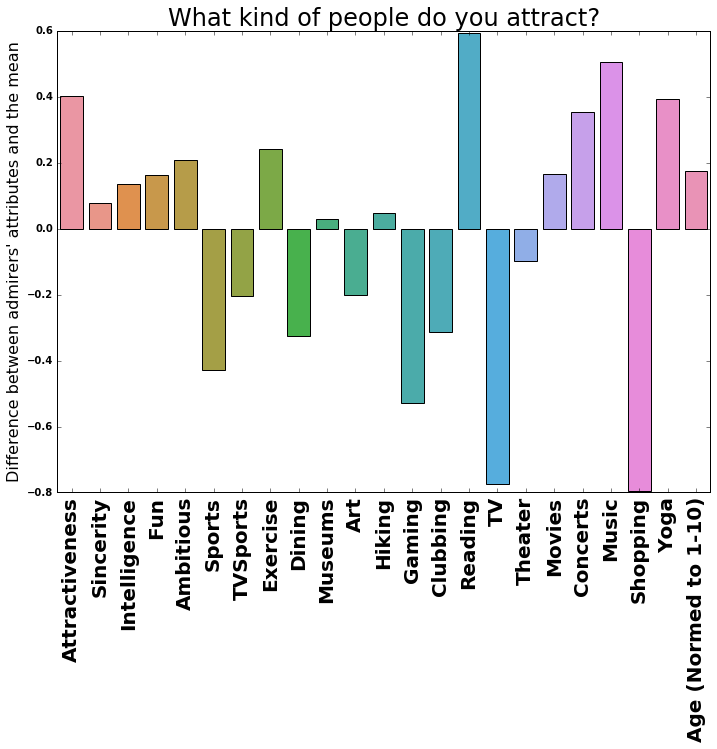

In [737]:
x = difference_ser.index
y = difference_ser
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.barplot(x, y, ax=ax)
ax.set_title('What kind of people do you attract?', fontsize=24)
xticks = ax.set_xticklabels(labels=x, rotation=90, fontsize=20)
ax.set_ylabel("Difference between admirers' attributes and the mean", fontsize=16)